In [495]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [496]:
X_data = np.genfromtxt(r'x.csv',delimiter=',')
n = len(X_data)

In [497]:
def initializer(K):
    pi = np.random.randint(low=1, high=10, size=K)
    pi = pi/pi.sum()
    theta = np.random.rand(K)
    return pi, theta

In [498]:
def ML_EM(X_data, K):
    n = len(X_data)
    # Initialize pi, theta
    pi, theta = initializer(K)
    LML = []       #list for log marginal likelihood
    T = 50         # iterations
    for t in range(T):
# E Step
        phi_ij = np.zeros((n,K))
        for i in range(n):
            for j in range(K):
                phi_ij[i][j] = pi[j] * binom.pmf(X_data[i], 20, theta[j])
        for i in range(n):
            phi_ij[i, :] = phi_ij[i, :] / np.sum(phi_ij[i, :])

# M Step
        nj = np.sum(phi_ij, axis=0)
        for j in range(K):
            theta[j] = 1 / (20 * nj[j]) * np.dot(X_data.T, phi_ij[:, j])
            pi[j] = nj[j] / n
# Calculate log marginal likelihood
        ft = 0
        for i in range(n):
            temp = 0
            for j in range(K):
                temp = temp + pi[j] * binom.pmf(X_data[i], 20, theta[j])
            ft += np.log(temp)
        print(ft)
        LML.append(ft)
    return phi_ij, LML

In [499]:
# #E-step
# def estep(phi_ij,theta,pi):
#     num = []
#     for ix in range(len(X_data)):
#         num.append(np.multiply(pi, binom.pmf(X_data[ix],20,theta)))
#     num = np.array(num)
#     den = num.sum(axis=1).reshape(-1,1)
#     print(den)
#     phi_ij = num/den
#     return phi_ij
# phi_ij = np.zeros((n, 3))
# phi_ij = estep(phi_ij,theta,pi)
# print("phi_ij",phi_ij)
# phi_ij.sum(axis=0)

In [500]:
# number = np.array([[1,2,3],[4,5,6]])
# number
# number.sum(axis=0).reshape(-1,1)

In [501]:
# #print(phi_ij.T)
# def mstep(phi_ij):
#     nj = np.sum(phi_ij,axis = 0)
# #    print("nj",nj)
#     K = len(nj)
#     njx = np.zeros((1,K))
#     njx = np.dot(phi_ij.T,X_data.T)
#     thetaj = njx/(20*nj)
#     pij = nj/n
#     return pij, thetaj
# mstep(phi_ij)

In [502]:
# def EM(K):
#     T=50 # iterations
#     pi, theta = initializer(K)
#     phi_ij = np.ones((n, K))
#     n_j = np.zeros(K)
#     ft = np.zeros(T)
#     for t in range(T):
#         for j in range(K):
#         # E-step
#             for i in range(n):
#                 phi_ij[i][j] = pi[j]*binom.pmf(X_data[i],20,theta[j])/sum([pi[k]*binom.pmf(X_data[i],20,theta[k]) for k in range(K)])
#         # M-step
#             n_j[j] = sum([phi_ij[i][j] for i in range(n)])
#             theta[j] = 0.05/n_j[j]*sum([phi_ij[i][j]*X_data[i] for i in range(n)])
#             pi[j] = n_j[j]/n
#         # Calculate log marginal likelihood
#         ft[t] = sum([phi_ij[i][j]*(np.log(binom.pmf(X_data[i],20,theta[j]))+np.log(pi[j])) for i in range(n) for j in range(K)])
#     return ft,phi_ij
# ft1, phi_ij1 = EM(3)
# ft1

In [503]:
# def MLEM(K):
#     T = 50 #iterations
#     pi, theta = initializer(K)
# #    print(pi,theta)
#     phi_ij = np.ones((n,K))
# #    n_j = np.zeros(K)
#     ft = np.zeros(T)
#     for t in range(50):
#         phi_ij = estep(phi_ij,theta,pi)
#         pi,theta = mstep(phi_ij)
# #        print(pi,theta)
#         ft[t] = np.sum([phi_ij[i][j]*(np.log(binom.pmf(X_data[i],20,theta[j]))+np.log(pi[j])) for i in range(n) for j in range(K)])
#         print(ft[t])
#     return ft,phi_ij

-6104.177488270638
-5993.860812564217
-5947.789915148692
-5889.605621800288
-5827.367099155488
-5784.080308451768
-5761.6076113572835
-5751.3413367844405
-5746.611345819139
-5744.23491652197
-5742.923126201471
-5742.151220268463
-5741.681497469659
-5741.39123375355
-5741.210656593168
-5741.097968759624
-5741.027529041192
-5740.983448899295
-5740.955840156795
-5740.938535355809
-5740.927682217239
-5740.920871841015
-5740.916596443679
-5740.913911479966
-5740.912224816151
-5740.911165019307
-5740.9104989785465
-5740.910080332935
-5740.909817156839
-5740.909651698269
-5740.909547666084
-5740.909482251809
-5740.909441117885
-5740.909415250973
-5740.909398984118
-5740.909388754171
-5740.90938232068
-5740.909378274508
-5740.9093757299015
-5740.909374129578
-5740.909373122951
-5740.909372489979
-5740.9093720918545
-5740.90937184146
-5740.909371683956
-5740.90937158497
-5740.909371522618
-5740.90937148344
-5740.909371458818
-5740.909371443259


Text(0, 0.5, 'log marginal likelihood')

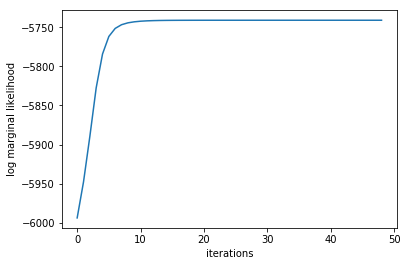

In [504]:
phi_ij1,ft1 = ML_EM(X_data,3)
#ft1,phi_ij1 = MLEM(3)
plt.plot(range(49),ft1[1:])
plt.xlabel('iterations')
plt.ylabel('log marginal likelihood')

In [479]:
list01 = []
for i in phi_ij1:
    list01.append(np.argmax(i))
phi_ij1

array([[9.97529349e-01, 2.47064803e-03, 3.29559188e-09],
       [5.88048351e-10, 2.09332522e-03, 9.97906674e-01],
       [1.92971567e-07, 3.37829221e-02, 9.66216885e-01],
       ...,
       [9.99451045e-01, 5.48955111e-04, 1.79358297e-10],
       [9.99451045e-01, 5.48955111e-04, 1.79358297e-10],
       [1.07564106e-08, 8.49143617e-03, 9.91508553e-01]])

Text(0, 0.5, 'The most probable cluster')

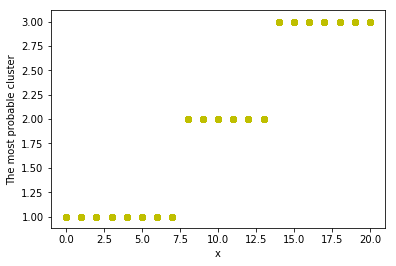

In [480]:
plt.scatter(X_data,np.array(list01)+1,c='y', label='Scatter')
#plt.legend()
plt.xlabel('x')
plt.ylabel('The most probable cluster')

In [361]:
phi_ij2,ft2 = ML_EM(X_data,9)
ft2

-5821.8712174528555
-5782.834044095457
-5767.585223073415
-5759.778483938356
-5755.428688518698
-5752.748922060261
-5750.930876626964
-5749.596964187916
-5748.559935056702
-5747.720091545438
-5747.020255331393
-5746.425159374232
-5745.911549111099
-5745.463184447621
-5745.068182996875
-5744.717530767544
-5744.404200948844
-5744.122603980334
-5743.868226579054
-5743.63738361462
-5743.4270404812805
-5743.23468144301
-5743.058209186477
-5742.895866366552
-5742.746173178963
-5742.60787698821
-5742.479911270687
-5742.361361940306
-5742.251439642442
-5742.149456956529
-5742.054809685591
-5741.966961572659
-5741.885431903616
-5741.8097855366605
-5741.739624963667
-5741.674584058183
-5741.614323211227
-5741.558525588491
-5741.506894283759
-5741.459150171645
-5741.4150302962935
-5741.374286659329
-5741.33668529611
-5741.3020055539455
-5741.270039503728
-5741.240591434147
-5741.213477394671
-5741.188524757375
-5741.16557178686
-5741.144467205206


[-5821.8712174528555,
 -5782.834044095457,
 -5767.585223073415,
 -5759.778483938356,
 -5755.428688518698,
 -5752.748922060261,
 -5750.930876626964,
 -5749.596964187916,
 -5748.559935056702,
 -5747.720091545438,
 -5747.020255331393,
 -5746.425159374232,
 -5745.911549111099,
 -5745.463184447621,
 -5745.068182996875,
 -5744.717530767544,
 -5744.404200948844,
 -5744.122603980334,
 -5743.868226579054,
 -5743.63738361462,
 -5743.4270404812805,
 -5743.23468144301,
 -5743.058209186477,
 -5742.895866366552,
 -5742.746173178963,
 -5742.60787698821,
 -5742.479911270687,
 -5742.361361940306,
 -5742.251439642442,
 -5742.149456956529,
 -5742.054809685591,
 -5741.966961572659,
 -5741.885431903616,
 -5741.8097855366605,
 -5741.739624963667,
 -5741.674584058183,
 -5741.614323211227,
 -5741.558525588491,
 -5741.506894283759,
 -5741.459150171645,
 -5741.4150302962935,
 -5741.374286659329,
 -5741.33668529611,
 -5741.3020055539455,
 -5741.270039503728,
 -5741.240591434147,
 -5741.213477394671,
 -5741.18852

Text(0, 0.5, 'log marginal likelihood')

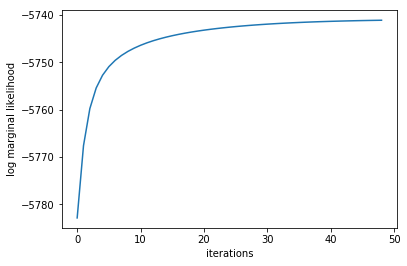

In [362]:
plt.plot(range(49),ft2[1:])
plt.xlabel('iterations')
plt.ylabel('log marginal likelihood')
#phi_ij2

In [363]:
list02 = []
phi_ij2 = phi_ij2.T
for i in phi_ij2:
    list02.append(np.argmax(i))

Text(0, 0.5, 'The most probable cluster')

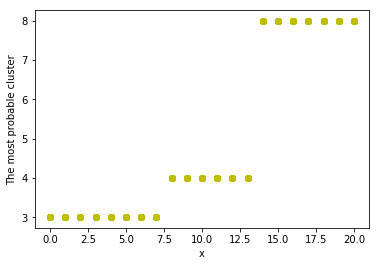

In [364]:
plt.scatter(X_data,np.array(list02)+1,c='y', label='Scatter')
#plt.legend()
plt.xlabel('x')
plt.ylabel('The most probable cluster')

In [375]:
phi_ij3,ft3 = ML_EM(X_data,15)
ft3

-5812.080594718311
-5779.801088133458
-5768.990482628892
-5762.563946964713
-5758.130503425984
-5754.929912933291
-5752.558756180225
-5750.761009737302
-5749.366718245833
-5748.261403343979
-5747.3670313256425
-5746.629642361148
-5746.0113061623615
-5745.4849011196775
-5745.030712773623
-5744.6341951381655
-5744.284474383505
-5743.973328618835
-5743.6944761164
-5743.443066809036
-5743.215311351079
-5743.008206683004
-5742.8193320663295
-5742.646698322482
-5742.488637898542
-5742.343726099441
-5742.210725549315
-5742.088547348322
-5741.976223749183
-5741.872888506987
-5741.7777622301455
-5741.690141012827
-5741.609387296448
-5741.534922338082
-5741.466219903492
-5741.402800933798
-5741.344228989635
-5741.290106318049
-5741.240070405979
-5741.193790913178
-5741.15096689634
-5741.111324260936
-5741.07461339698
-5741.040606971046
-5741.009097860178
-5740.9798972202525
-5740.952832688579
-5740.927746722267
-5740.904495072937
-5740.882945400054


[-5812.080594718311,
 -5779.801088133458,
 -5768.990482628892,
 -5762.563946964713,
 -5758.130503425984,
 -5754.929912933291,
 -5752.558756180225,
 -5750.761009737302,
 -5749.366718245833,
 -5748.261403343979,
 -5747.3670313256425,
 -5746.629642361148,
 -5746.0113061623615,
 -5745.4849011196775,
 -5745.030712773623,
 -5744.6341951381655,
 -5744.284474383505,
 -5743.973328618835,
 -5743.6944761164,
 -5743.443066809036,
 -5743.215311351079,
 -5743.008206683004,
 -5742.8193320663295,
 -5742.646698322482,
 -5742.488637898542,
 -5742.343726099441,
 -5742.210725549315,
 -5742.088547348322,
 -5741.976223749183,
 -5741.872888506987,
 -5741.7777622301455,
 -5741.690141012827,
 -5741.609387296448,
 -5741.534922338082,
 -5741.466219903492,
 -5741.402800933798,
 -5741.344228989635,
 -5741.290106318049,
 -5741.240070405979,
 -5741.193790913178,
 -5741.15096689634,
 -5741.111324260936,
 -5741.07461339698,
 -5741.040606971046,
 -5741.009097860178,
 -5740.9798972202525,
 -5740.952832688579,
 -5740.927

Text(0, 0.5, 'log marginal likelihood')

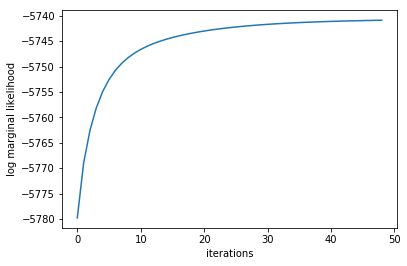

In [376]:
plt.plot(range(49),ft3[1:])
plt.xlabel('iterations')
plt.ylabel('log marginal likelihood')

In [377]:
list03 = []
phi_ij3 = phi_ij3.T
for i in phi_ij3:
    list03.append(np.argmax(i))

Text(0, 0.5, 'The most probable cluster')

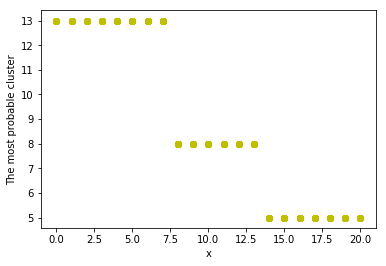

In [378]:
plt.scatter(X_data,np.array(list03)+1,c='y', label='Scatter')
#plt.legend()
plt.xlabel('x')
plt.ylabel('The most probable cluster')

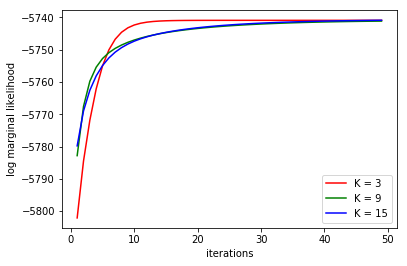

In [380]:
plt.plot(range(1,50),ft1[1:], 'r', label = 'K = 3')
plt.plot(range(1,50),ft2[1:], 'g', label = 'K = 9')
plt.plot(range(1,50),ft3[1:], 'b', label = 'K = 15')
plt.xlabel('iterations')
plt.ylabel('log marginal likelihood')
plt.legend()